In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pickle

sns.set(rc={'figure.figsize':(11.7,8.27)})

### Find quality of generated neighbors

In [135]:
proj_name = 'openstack'
dump_dataframe_dir = './dump_df/'
other_object_dir = './other_object/'
result_dir = './eval_result/'
# ['randompertubation','crossoverinterpolation']
# cos_sim__rand = pd.read_csv(dump_dataframe_dir+proj_name+'_randompertubation_cosine_similarity.csv').assign(Location='random perturbation')
# cos_sim__co = pd.read_csv(dump_dataframe_dir+proj_name+'_crossoverinterpolation_cosine_similarity.csv').assign(Location='crossover interpolation')
euc_dist_rand = pd.read_csv(dump_dataframe_dir+'RQ1_'+proj_name+'_randompertubation_euclidean_dist.csv').assign(Location='random perturbation')
euc_dist_co = pd.read_csv(dump_dataframe_dir+'RQ1_'+proj_name+'_crossoverinterpolation_euclidean_dist.csv').assign(Location='crossover interpolation')

# cos_sim_new = pd.concat([cos_sim__rand, cos_sim__co])    
euc_dist_new = pd.concat([euc_dist_rand, euc_dist_co])
euc_dist_new = euc_dist_new.drop('instance_id',axis=1)
# print(euc_dist_co.columns)
# print(cos_sim_new.columns)
# cos_sim_new.columns = ['mean','median','max', 'Location','mean','median','max']
euc_dist_new.columns = ['mean','median','max', 'Location','mean','median','max']
euc_dist_new = euc_dist_new.drop(['median','max'], axis=1)
# cos_sim_melt = pd.melt(cos_sim_new, id_vars=['Location'], var_name = ['aggregation_type'])
euc_dist_melt = pd.melt(euc_dist_new, id_vars=['Location'], var_name = ['aggregation_type'])

# mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
# print(mdf.head())

#    Location Letter     value
# 0         1      A  0.223565
# 1         1      A  0.515797
# 2         1      A  0.377588
# 3         1      A  0.687614
# 4         1      A  0.094116


In [136]:
# fig, axs = plt.subplots(2,2, figsize=(20,10))

# cos_sim__rand.boxplot(ax = axs[0,0])
# cos_sim__co.boxplot(ax = axs[0,1])
# euc_dist_rand.boxplot(ax = axs[1,0])
# euc_dist_co.boxplot(ax = axs[1,1])

# plt.title('cosine similarity')
# ax = sns.boxplot(x="Location", y="value", hue="aggregation_type", data=cos_sim_melt)    
# plt.show()

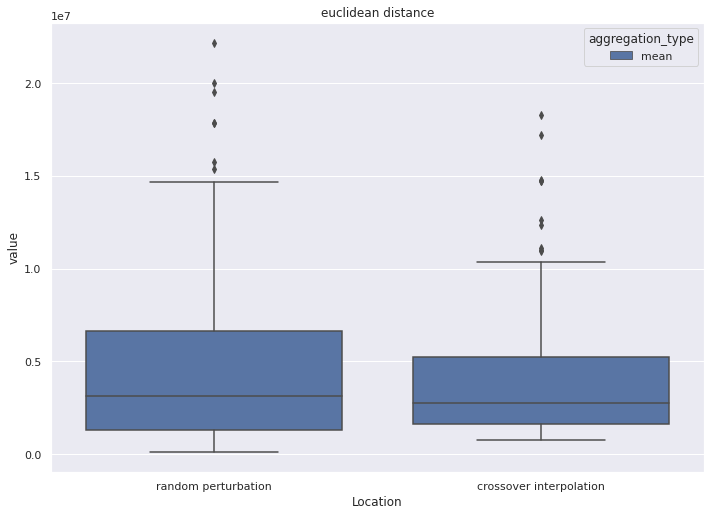

In [137]:
plt.title('euclidean distance')
ax = sns.boxplot(x="Location", y="value", hue="aggregation_type", data=euc_dist_melt)    
plt.show()

### Find predicted class ratio of generated instances

In [124]:
data_path = './dataset/'
result_dir = './eval_result/'
dump_dataframe_dir = './dump_df/'
generated_instance_dir = './generated_instance/'

correctly_predicted_result = pd.read_csv(dump_dataframe_dir+proj_name+'_correctly_predict_as_defective.csv')
correctly_predicted_result = correctly_predicted_result.set_index('Unnamed: 0')

In [125]:
# proj_name = 'openstack' # ['openstack','qt']
# instance_generation_mode = 'randompertubation' # ['randompertubation','crossoverinterpolation']
global_model = pickle.load((open(proj_name+'_global_model.pkl','rb')))


In [126]:
rand_defective_pred_count = []
rand_all_pred_count = []
crossover_defective_pred_count = []
crossover_all_pred_count = []

for i in range(0,len(correctly_predicted_result)):
    serie_name = str(correctly_predicted_result.iloc[i].name)
#     print(serie_name)
    rand_gen_inst = pickle.load(open(generated_instance_dir+proj_name+'_randompertubation_'+serie_name+'.pkl','rb'))
    crossover_gen_inst = pickle.load(open(generated_instance_dir+proj_name+'_crossoverinterpolation_'+serie_name+'.pkl','rb'))
    
    rand_pred = global_model.predict(rand_gen_inst)
    crossover_pred = global_model.predict(crossover_gen_inst)
    
#     rand_pred_num = [1 if val else 0 for val in rand_pred]
#     crossover_pred_num =  [1 if val else 0 for val in crossover_pred]
    
    rand_defective_pred_count.append(np.sum(rand_pred))
    rand_all_pred_count.append(len(rand_pred))
    crossover_defective_pred_count.append(np.sum(crossover_pred))
    crossover_all_pred_count.append(len(crossover_pred))
    
#     rand_pred_all.extend(rand_pred_num)
#     crossover_pred_all.extend(crossover_pred_num)
#     print(rand_pred)
#     print(rand_pred_num)
#     print(np.sum(rand_pred), len(rand_pred))
#     print(np.sum(crossover_pred), len(crossover_pred))
#     break

In [127]:
rand_pred_stat = pd.DataFrame()
rand_pred_stat['defect_count'] = rand_defective_pred_count
rand_pred_stat['total_pred'] = rand_all_pred_count
rand_pred_stat['defect_ratio'] = rand_pred_stat['defect_count']/rand_pred_stat['total_pred']

crossover_pred_stat = pd.DataFrame()
crossover_pred_stat['defect_count'] = crossover_defective_pred_count
crossover_pred_stat['total_pred'] = crossover_all_pred_count
crossover_pred_stat['defect_ratio'] = crossover_pred_stat['defect_count']/crossover_pred_stat['total_pred']
# # print(rand_pred_all.count(0),rand_pred_all.count(1), len(rand_pred_all))
# # print(crossover_pred_all.count(0),crossover_pred_all.count(1), len(crossover_pred_all))

# def cal_percent(target, total):
#     return (target*100)/total

# rand_clean_count = rand_pred_all.count(0)
# rand_defect_count = rand_pred_all.count(1)
# crossover_clean_count = crossover_pred_all.count(0)
# crossover_defect_count = crossover_pred_all.count(1)

# rand_clean_percent = cal_percent(rand_clean_count, len(rand_pred_all))
# rand_defect_percent = cal_percent(rand_defect_count, len(rand_pred_all))
# crossover_clean_percent = cal_percent(crossover_clean_count, len(crossover_pred_all))
# crossover_defect_percent = cal_percent(crossover_defect_count, len(crossover_pred_all))

# print(rand_clean_percent, rand_defect_percent)
# print(crossover_clean_percent, crossover_defect_percent)

<AxesSubplot:>

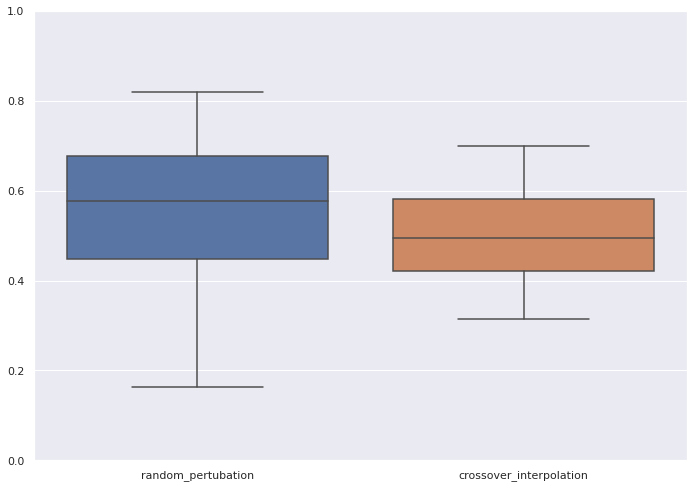

In [128]:
defect_ratio_df = pd.DataFrame()
defect_ratio_df['random_pertubation'] = rand_pred_stat['defect_ratio']
defect_ratio_df['crossover_interpolation'] = crossover_pred_stat['defect_ratio']
# display(defect_ratio_df)
# defect_ratio_df.boxplot()
plt.ylim([0,1])
sns.boxplot(data=defect_ratio_df)

### Plot explainer evaluation result

In [94]:
explainer_type = 'rulefit'
rand_eval = pd.read_csv(result_dir+proj_name+'_randompertubation_'+explainer_type+'_explainer_eval.csv').assign(Instance_Generation='random perturbation')
crossover_eval = pd.read_csv(result_dir+proj_name+'_crossoverinterpolation_'+explainer_type+'_explainer_eval.csv').assign(Instance_Generation='crossover interpolation')

In [95]:
print(rand_eval.head())

   precision    recall        f1  balanced_acc        R2  Instance_Generation
0        1.0  1.000000  1.000000      1.000000  1.000000  random perturbation
1        1.0  1.000000  1.000000      1.000000  1.000000  random perturbation
2        1.0  0.996454  0.998224      0.998227  0.995061  random perturbation
3        1.0  1.000000  1.000000      1.000000  1.000000  random perturbation
4        1.0  1.000000  1.000000      1.000000  1.000000  random perturbation


In [101]:
combined_result = pd.concat([rand_eval, crossover_eval])
combined_result_melt = pd.melt(combined_result, id_vars=['Instance_Generation'], var_name = ['metrics'])

In [102]:
# print(combined_result_melt.head())

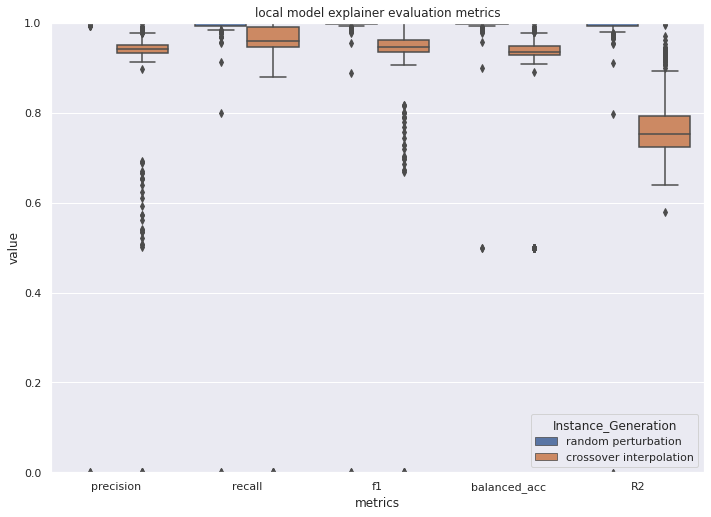

In [103]:
plt.ylim([0,1])
plt.title('local model explainer evaluation metrics')
ax = sns.boxplot(x="metrics", y="value", hue="Instance_Generation", data=combined_result_melt)    
plt.show()